**Bidirectional LSTM**

Aplicação do ``neuralmind/bert-large-portuguese-cased`` na base de dados classificada manualmente

---


🧠 Modelo: neuralmind/bert-base-portuguese-cased
💻 Dispositivo: cuda


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Saving feedbacks_2025_1 - feedbacks_standardized.xlsx to feedbacks_2025_1 - feedbacks_standardized.xlsx

📊 Distribuição original das classes:
label
2    569
1    353
0    307
Name: count, dtype: int64

===== 🧩 FOLD 1/5 =====
⚖️ Pesos (fold 1): [1.3374149799346924, 1.1578327417373657, 0.7201465368270874]


Map:   0%|          | 0/983 [00:00<?, ? examples/s]

Map:   0%|          | 0/246 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

⚖️ Pesos das classes aplicados: [1.3374149799346924, 1.1578327417373657, 0.7201465368270874]


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.456542,0.873984,0.879777,0.873984,0.867832
2,0.703400,0.372467,0.853659,0.857294,0.853659,0.850548
3,0.703400,0.291827,0.898374,0.900275,0.898374,0.897221
4,0.280300,0.300436,0.890244,0.890938,0.890244,0.890570
5,0.121500,0.313879,0.906504,0.907839,0.906504,0.905890


Fold 1 → Acurácia: 0.9065, Precisão: 0.9078, Recall: 0.9065, F1: 0.9059


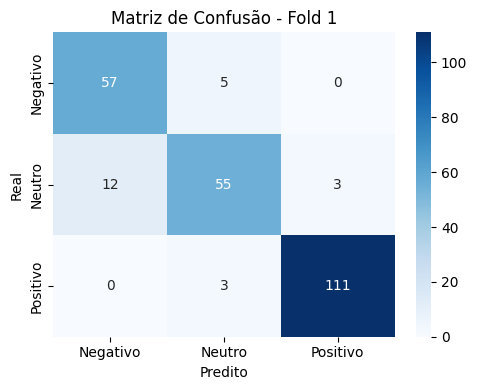


===== 🧩 FOLD 2/5 =====
⚖️ Pesos (fold 2): [1.3374149799346924, 1.1578327417373657, 0.7201465368270874]


Map:   0%|          | 0/983 [00:00<?, ? examples/s]

Map:   0%|          | 0/246 [00:00<?, ? examples/s]

⚖️ Pesos das classes aplicados: [1.3374149799346924, 1.1578327417373657, 0.7201465368270874]


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.473820,0.817073,0.821102,0.817073,0.809176
2,0.653600,0.375408,0.857724,0.856655,0.857724,0.856420
3,0.653600,0.396536,0.865854,0.865576,0.865854,0.865243
4,0.247100,0.417117,0.865854,0.862798,0.865854,0.863434
5,0.123700,0.422339,0.886179,0.884509,0.886179,0.884694


Fold 2 → Acurácia: 0.8862, Precisão: 0.8845, Recall: 0.8862, F1: 0.8847


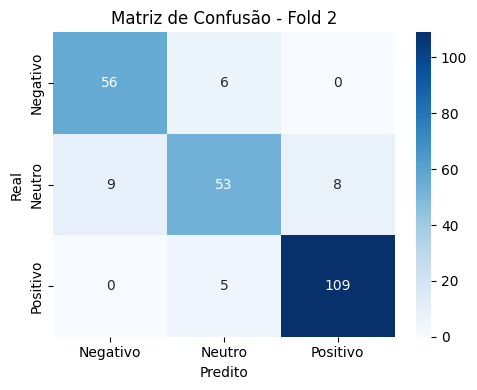


===== 🧩 FOLD 3/5 =====
⚖️ Pesos (fold 3): [1.3319783210754395, 1.1619385480880737, 0.7201465368270874]


Map:   0%|          | 0/983 [00:00<?, ? examples/s]

Map:   0%|          | 0/246 [00:00<?, ? examples/s]

⚖️ Pesos das classes aplicados: [1.3319783210754395, 1.1619385480880737, 0.7201465368270874]


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.497362,0.837398,0.848186,0.837398,0.840887
2,0.666300,0.347845,0.865854,0.869111,0.865854,0.866942
3,0.666300,0.314293,0.890244,0.892373,0.890244,0.891067
4,0.268900,0.357431,0.886179,0.891622,0.886179,0.888059
5,0.116500,0.362792,0.890244,0.896979,0.890244,0.892265


Fold 3 → Acurácia: 0.8902, Precisão: 0.8970, Recall: 0.8902, F1: 0.8923


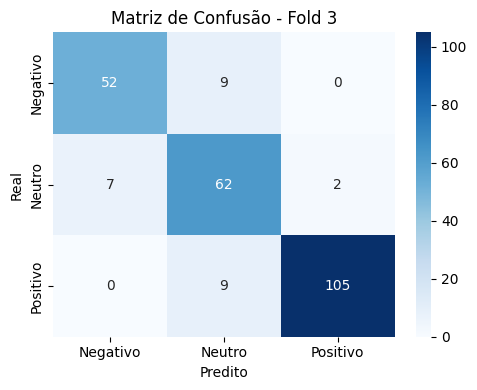


===== 🧩 FOLD 4/5 =====
⚖️ Pesos (fold 4): [1.3319783210754395, 1.1619385480880737, 0.7201465368270874]


Map:   0%|          | 0/983 [00:00<?, ? examples/s]

Map:   0%|          | 0/246 [00:00<?, ? examples/s]

⚖️ Pesos das classes aplicados: [1.3319783210754395, 1.1619385480880737, 0.7201465368270874]


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.448623,0.849593,0.852834,0.849593,0.846332
2,0.673900,0.304870,0.890244,0.890492,0.890244,0.890342
3,0.673900,0.272982,0.910569,0.910516,0.910569,0.909717
4,0.260600,0.265015,0.922764,0.922125,0.922764,0.921969
5,0.131700,0.253165,0.926829,0.926377,0.926829,0.926213


Fold 4 → Acurácia: 0.9268, Precisão: 0.9264, Recall: 0.9268, F1: 0.9262


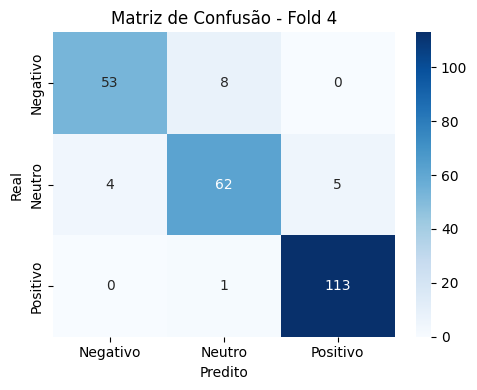


===== 🧩 FOLD 5/5 =====
⚖️ Pesos (fold 5): [1.3333333730697632, 1.1631205081939697, 0.719298243522644]


Map:   0%|          | 0/984 [00:00<?, ? examples/s]

Map:   0%|          | 0/245 [00:00<?, ? examples/s]

⚖️ Pesos das classes aplicados: [1.3333333730697632, 1.1631205081939697, 0.719298243522644]


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.487793,0.836735,0.833465,0.836735,0.834479
2,0.652500,0.470509,0.820408,0.844896,0.820408,0.825477
3,0.652500,0.477682,0.832653,0.835121,0.832653,0.833546
4,0.230700,0.504548,0.857143,0.861058,0.857143,0.858700
5,0.112400,0.525686,0.853061,0.858929,0.853061,0.855172


Fold 5 → Acurácia: 0.8531, Precisão: 0.8589, Recall: 0.8531, F1: 0.8552


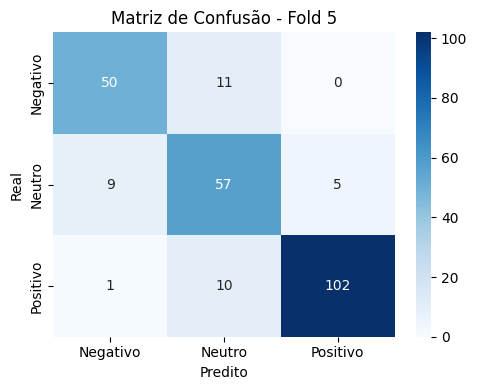


===== 📊 RESULTADOS MÉDIOS =====
Acurácia Média: 0.8926
Precisão Média: 0.8949
Recall Médio: 0.8926
F1-Score Médio: 0.8928


/tmp/ipython-input-3179141818.py:274: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


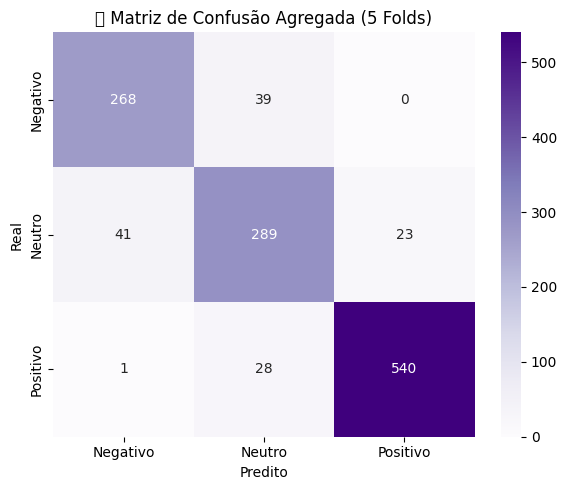

In [ ]:
# ==========================================
# 📦 1. IMPORTS E CONFIGURAÇÕES INICIAIS
# ==========================================
import os
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.optim import AdamW
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
# 🟩 Import oficial do scikit-learn
from sklearn.utils.class_weight import compute_class_weight

from transformers import (
    AutoTokenizer,
    AutoModel,
    AutoConfig,
    TrainingArguments,
    Trainer
)
from datasets import Dataset
from google.colab import files

# ==========================================
# ⚙️ 2. CONFIGURAÇÕES GERAIS
# ==========================================
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)

EPOCHS = 5
BATCH_SIZE = 16
LEARNING_RATE = 2e-5
MAX_LEN = 128
N_SPLITS = 5
DROPOUT = 0.4
MODEL_NAME = "neuralmind/bert-base-portuguese-cased"

print("🧠 Modelo:", MODEL_NAME)
print("💻 Dispositivo:", DEVICE)

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# ==========================================
# 📁 3. CARREGAMENTO DO DATASET
# ==========================================
uploaded = files.upload()
data_path = list(uploaded.keys())[0]

if data_path.endswith(".xlsx"):
    df = pd.read_excel(data_path)
else:
    df = pd.read_csv(data_path)

df = df[["text", "label"]].dropna()
df["label"] = df["label"].astype(int)
df["text"] = df["text"].astype(str)

print("\n📊 Distribuição original das classes:")
print(df["label"].value_counts())

# ==========================================
# 🧩 4. CLASSE DO MODELO: BERT + BiLSTM + ATENÇÃO
# ==========================================
class BertBiLSTMAttention(nn.Module):
    # 🟩 Novo parâmetro para receber labels de treino
    def __init__(self, model_name, num_labels=3, lstm_hidden=256, dropout=0.4, labels_for_weights=None):
        super().__init__()

        self.config = AutoConfig.from_pretrained(model_name)
        self.bert = AutoModel.from_pretrained(model_name, config=self.config)
        hidden_size = self.config.hidden_size
        self.lstm_hidden = lstm_hidden

        # 🔹 BiLSTM bidirecional
        self.bilstm = nn.LSTM(
            input_size=hidden_size,
            hidden_size=lstm_hidden,
            num_layers=1,
            batch_first=True,
            bidirectional=True
        )

        # 🔹 Atenção e saída final
        self.attention = nn.Linear(lstm_hidden * 2, 1)
        self.dropout = nn.Dropout(dropout)
        self.classifier = nn.Linear(lstm_hidden * 2, num_labels)

        # 🟩 Cálculo de pesos conforme documentação do scikit-learn
        if labels_for_weights is not None:
            labels_for_weights = np.asarray(labels_for_weights, dtype=int)
            classes_arr = np.array([0, 1, 2])  # define todas as classes
            weights = compute_class_weight(
                class_weight="balanced",
                classes=classes_arr,
                y=labels_for_weights
            )
            weights = torch.tensor(weights, dtype=torch.float).to(DEVICE)
            print(f"⚖️ Pesos das classes aplicados: {weights.tolist()}")
            self.criterion = nn.CrossEntropyLoss(weight=weights)
        else:
            self.criterion = nn.CrossEntropyLoss()

    def forward(self, input_ids=None, attention_mask=None, labels=None):
        bert_out = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        seq_out = bert_out.last_hidden_state
        lstm_out, _ = self.bilstm(seq_out)
        attn_scores = self.attention(lstm_out).squeeze(-1)
        attn_weights = torch.softmax(
            attn_scores.masked_fill(attention_mask == 0, -1e9),
            dim=1
        ).unsqueeze(-1)
        weighted = torch.sum(attn_weights * lstm_out, dim=1)
        x = self.dropout(weighted)
        logits = self.classifier(x)

        loss = None
        if labels is not None:
            loss = self.criterion(logits, labels)

        return {"loss": loss, "logits": logits}

# ==========================================
# 🔄 5. TREINAMENTO COM STRATIFIED K-FOLD
# ==========================================
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED)
accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

classes = np.array([0, 1, 2])
labels_names = ["Negativo", "Neutro", "Positivo"]
cm_total = np.zeros((len(classes), len(classes)), dtype=int)
all_labels, all_probs = [], []

def tokenize(batch):
    return tokenizer(
        batch["text"],
        truncation=True,
        padding="max_length",
        max_length=MAX_LEN
    )

# ==========================================
# 🔁 LOOP DOS FOLDS
# ==========================================
for fold, (train_idx, val_idx) in enumerate(skf.split(df["text"], df["label"])):
    print(f"\n===== 🧩 FOLD {fold+1}/{N_SPLITS} =====")

    train_df = df.iloc[train_idx]
    val_df = df.iloc[val_idx]

    # 🟩 Cálculo de pesos balanceados por fold (documentação oficial)
    y_train = np.asarray(train_df["label"].values, dtype=int)
    classes_arr = np.array([0, 1, 2])
    weights = compute_class_weight(
        class_weight="balanced",
        classes=classes_arr,
        y=y_train
    )
    weights = torch.tensor(weights, dtype=torch.float).to(DEVICE)
    print(f"⚖️ Pesos (fold {fold+1}):", weights.tolist())

    # Criação dos datasets
    train_dataset = Dataset.from_pandas(train_df)
    val_dataset = Dataset.from_pandas(val_df)

    train_dataset = train_dataset.map(tokenize, batched=True)
    val_dataset = val_dataset.map(tokenize, batched=True)

    train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])
    val_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])

    # 🟩 Modelo recebe labels de treino para calcular a loss ponderada
    model = BertBiLSTMAttention(
        MODEL_NAME,
        num_labels=3,
        lstm_hidden=256,
        dropout=DROPOUT,
        labels_for_weights=y_train
    ).to(DEVICE)

    optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)

    training_args = TrainingArguments(
        output_dir=f"./results_fold_{fold}",
        per_device_train_batch_size=BATCH_SIZE,
        per_device_eval_batch_size=BATCH_SIZE,
        num_train_epochs=EPOCHS,
        learning_rate=LEARNING_RATE,
        weight_decay=0.01,
        eval_strategy="epoch",
        save_strategy="no",
        logging_dir=f"./logs_fold_{fold}",
        logging_steps=100,
        disable_tqdm=False,
        report_to="none"
    )

    def compute_metrics(pred):
        labels = pred.label_ids
        preds = np.argmax(pred.predictions, axis=1)
        acc = accuracy_score(labels, preds)
        prec = precision_score(labels, preds, average="weighted", zero_division=0)
        rec = recall_score(labels, preds, average="weighted", zero_division=0)
        f1 = f1_score(labels, preds, average="weighted", zero_division=0)
        return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1}

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_metrics,
    )

    trainer.train()

    # Avaliação
    preds_output = trainer.predict(val_dataset)
    logits = preds_output.predictions
    probs = torch.softmax(torch.tensor(logits), dim=1).numpy()
    preds = np.argmax(logits, axis=1)
    labels = preds_output.label_ids

    acc = accuracy_score(labels, preds)
    prec = precision_score(labels, preds, average="weighted", zero_division=0)
    rec = recall_score(labels, preds, average="weighted", zero_division=0)
    f1 = f1_score(labels, preds, average="weighted", zero_division=0)

    accuracy_list.append(acc)
    precision_list.append(prec)
    recall_list.append(rec)
    f1_list.append(f1)

    print(f"Fold {fold+1} → Acurácia: {acc:.4f}, Precisão: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")

    cm = confusion_matrix(labels, preds, labels=classes)
    cm_total += cm

    all_labels.extend(labels)
    all_probs.extend(probs)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels_names, yticklabels=labels_names)
    plt.title(f"Matriz de Confusão - Fold {fold+1}")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

# ==========================================
# 📈 6. RESULTADOS MÉDIOS
# ==========================================
print("\n===== 📊 RESULTADOS MÉDIOS =====")
print(f"Acurácia Média: {np.mean(accuracy_list):.4f}")
print(f"Precisão Média: {np.mean(precision_list):.4f}")
print(f"Recall Médio: {np.mean(recall_list):.4f}")
print(f"F1-Score Médio: {np.mean(f1_list):.4f}")

plt.figure(figsize=(6,5), dpi=200)
sns.set_theme(style="white", context="paper")
sns.heatmap(cm_total, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels_names, yticklabels=labels_names)
plt.title(" Matriz de Confusão Agregada (5 Folds)")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


In [ ]:
# =========================
# Célula 0 — Setup estável (GPU CUDA 12.6)
# =========================
# 1) Remover pacotes que causam conflito / restos de instalações
!pip uninstall -y torch torchvision torchaudio xformers flash-attn triton bitsandbytes cudf-cu12 pylibcudf-cu12 cuml-cu12 fastai -q
!bash -lc 'rm -rf /usr/local/lib/python3.12/dist-packages/*~orch* || true'

# 2) Instalar PyTorch coerente com o Colab (CUDA 12.6)
#    Se estiver SEM GPU, veja a célula alternativa mais abaixo (CPU).
!pip install --no-cache-dir --index-url https://download.pytorch.org/whl/cu126 \
  torch==2.8.0 torchvision==0.23.0 torchaudio==2.8.0 -q

# 3) Hugging Face + deps compatíveis (datasets pede pyarrow>=21)
!pip install --no-cache-dir "pyarrow>=21,<22" -q
!pip install --no-cache-dir -U transformers==4.45.2 datasets==3.0.2 accelerate scikit-learn seaborn matplotlib -q

# 4) Imports
import os, gc, random
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
)
from sklearn.utils.class_weight import compute_class_weight

from transformers import AutoTokenizer, AutoModel, AutoConfig, TrainingArguments, Trainer
from datasets import Dataset
from torch import nn
from torch.optim import AdamW
from google.colab import files

# 5) Reprodutibilidade
SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)
if torch.cuda.is_available(): torch.cuda.manual_seed_all(SEED)
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")



print("✅ Setup completo!")
print("Torch        :", torch.__version__)
import transformers, datasets, pyarrow
print("Transformers :", transformers.__version__)
print("Datasets     :", datasets.__version__)
print("PyArrow      :", pyarrow.__version__)
print("Device       :", DEVICE)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.8/821.8 MB 127.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.6/155.6 MB 150.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 220.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 176.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 366.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 317.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 215.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 355.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 285.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not current

In [ ]:
# =========================
# Célula 1 — Upload do dataset
# =========================
print("Faça upload do arquivo CSV/Excel (ex: feedbacks_standardized.csv) com colunas: text, label (0/1/2)")
uploaded = files.upload()
fname = list(uploaded.keys())[0]

if fname.lower().endswith((".xlsx", ".xls")):
    df = pd.read_excel(fname)
else:
    df = pd.read_csv(fname)

# garantir colunas
assert "text" in df.columns and "label" in df.columns, "O arquivo precisa ter colunas 'text' e 'label' (0,1,2)."
df = df[["text","label"]].dropna().reset_index(drop=True)
df["label"] = df["label"].astype(int)
# Ensure the 'text' column is string type
df['text'] = df['text'].astype(str)
print("Linhas:", len(df))
print(df["label"].value_counts())
display(df.head())

Faça upload do arquivo CSV/Excel (ex: feedbacks_standardized.csv) com colunas: text, label (0/1/2)


Saving feedbacks_2025_1 - feedbacks_standardized.xlsx to feedbacks_2025_1 - feedbacks_standardized.xlsx
Linhas: 1229
label
2    569
1    353
0    307
Name: count, dtype: int64


,text,label
0,"A internet não funcionou muito bem, não conseg...",0
1,Sugiro conversar com os alunos para reduzir o ...,0
2,A rede Atitus_Eventos não está conectando,0
3,"Explicar com mais calma, são muitos detalhes e...",0
4,"bah, tem que melhorar a internet de algum jeit...",0


In [ ]:
# =========================
# Célula 2 — Hiperparâmetros principais
# =========================
MODEL_NAME = "neuralmind/bert-large-portuguese-cased"  # BERTimbau-large
NUM_LABELS = 3
MAX_LEN = 128
EPOCHS = 5
BATCH_SIZE = 16   # se OOM, reduzir para 8
LR = 2e-5
WEIGHT_DECAY = 0.01
DROPOUT = 0.4
N_SPLITS = 5

print(f"Modelo: {MODEL_NAME}\nepochs={EPOCHS}, batch_size={BATCH_SIZE}, lr={LR}, max_len={MAX_LEN}")


Modelo: neuralmind/bert-large-portuguese-cased
epochs=5, batch_size=16, lr=2e-05, max_len=128


In [ ]:
# =========================
# Célula 3 — Definir o modelo híbrido PyTorch
# =========================
class BertBiLSTMAttention(nn.Module):
    def __init__(self, model_name, num_labels=3, lstm_hidden=256, dropout=0.4, labels_for_weights=None):
        super().__init__()
        # Carrega configuração e backbone BERT (somente uma vez por criação)
        self.config = AutoConfig.from_pretrained(model_name)
        self.bert = AutoModel.from_pretrained(model_name, config=self.config)
        hidden_size = self.config.hidden_size  # 1024 para large
        self.lstm_hidden = lstm_hidden

        # Bidirectional LSTM (usa saída de token do BERT como input)
        self.bilstm = nn.LSTM(
            input_size=hidden_size,
            hidden_size=lstm_hidden,
            num_layers=1,
            batch_first=True,
            bidirectional=True
        )

        # 🟩 Cálculo dos pesos balanceados das classes
        if labels_for_weights is not None:
            classes_arr = np.unique(labels_for_weights)
            weights = compute_class_weight(
                class_weight="balanced",
                classes=classes_arr,
                y=labels_for_weights
            )
            weights = torch.tensor(weights, dtype=torch.float)
            print("⚖️ Pesos das classes:", weights.tolist())
            self.criterion = nn.CrossEntropyLoss(weight=weights.to(DEVICE))
        else:
            self.criterion = nn.CrossEntropyLoss()

        # Atenção simples: projeta cada hidden state para um escalar, aplica softmax no tempo
        self.attention = nn.Linear(lstm_hidden * 2, 1)

        self.dropout = nn.Dropout(dropout)
        self.classifier = nn.Linear(lstm_hidden * 2, num_labels)

        # loss
        self.criterion = nn.CrossEntropyLoss()

    def forward(self, input_ids=None, attention_mask=None, labels=None):
        # BERT outputs: last_hidden_state (batch, seq_len, hidden_size)
        bert_out = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        sequence_output = bert_out.last_hidden_state  # (B, T, H)
        # pass through BiLSTM
        lstm_out, _ = self.bilstm(sequence_output)  # (B, T, 2*hidden)
        # attention scores
        attn_scores = self.attention(lstm_out).squeeze(-1)  # (B, T)
        attn_weights = torch.softmax(attn_scores.masked_fill(attention_mask == 0, -1e9), dim=1).unsqueeze(-1)  # (B,T,1)
        # weighted sum
        weighted = torch.sum(attn_weights * lstm_out, dim=1)  # (B, 2*hidden)
        x = self.dropout(weighted)
        logits = self.classifier(x)  # (B, num_labels)

        loss = None
        if labels is not None:
            loss = self.criterion(logits, labels)

        # Trainer expects either (loss, logits, ...) or ModelOutput. We return as dict.
        output = {"loss": loss, "logits": logits}
        return output


In [ ]:
# =========================
# Célula 4 — Tokenizer e função utilitária
# =========================
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

def tokenize_batch(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=MAX_LEN)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/155 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/648 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]


===== FOLD 1/5 =====


Map:   0%|          | 0/983 [00:00<?, ? examples/s]

Map:   0%|          | 0/246 [00:00<?, ? examples/s]

⚖️ Pesos das classes: [1.3374149799346924, 1.1578327417373657, 0.7201465368270874]


Epoch,Training Loss,Validation Loss,Accuracy,Precision Macro,Recall Macro,F1 Macro,F1 Weighted
1,0.803500,0.359124,0.894309,0.883180,0.877403,0.879587,0.892666
2,0.373100,0.268523,0.894309,0.884869,0.876174,0.880139,0.893267
3,0.240400,0.282540,0.914634,0.908026,0.901833,0.902092,0.912513
4,0.123600,0.328460,0.918699,0.910134,0.905366,0.907008,0.917547
5,0.059600,0.371288,0.914634,0.908026,0.901833,0.902092,0.912513


Fold 1 — acc: 0.9146, f1_macro: 0.9021, f1_weighted: 0.9125


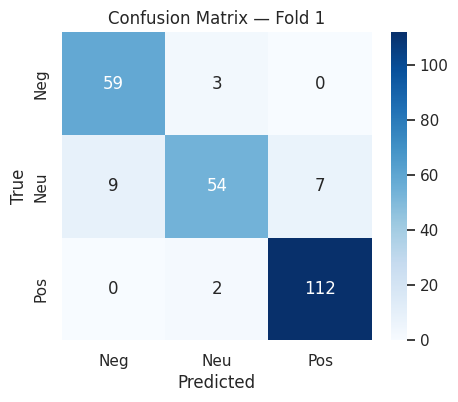


===== FOLD 2/5 =====


Map:   0%|          | 0/983 [00:00<?, ? examples/s]

Map:   0%|          | 0/246 [00:00<?, ? examples/s]

⚖️ Pesos das classes: [1.3374149799346924, 1.1578327417373657, 0.7201465368270874]


Epoch,Training Loss,Validation Loss,Accuracy,Precision Macro,Recall Macro,F1 Macro,F1 Weighted
1,0.751800,0.491058,0.804878,0.784127,0.792239,0.787407,0.806186
2,0.378300,0.379165,0.869919,0.862330,0.852508,0.856134,0.867217
3,0.228300,0.459421,0.861789,0.849300,0.842978,0.845758,0.860303
4,0.190000,0.553666,0.857724,0.852140,0.840049,0.844166,0.858739
5,0.086100,0.554678,0.861789,0.853616,0.848492,0.850536,0.862624


Fold 2 — acc: 0.8618, f1_macro: 0.8505, f1_weighted: 0.8626


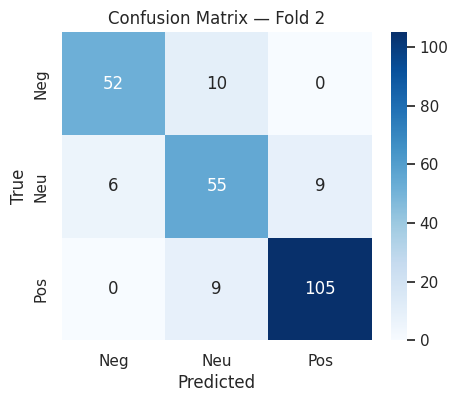


===== FOLD 3/5 =====


Map:   0%|          | 0/983 [00:00<?, ? examples/s]

Map:   0%|          | 0/246 [00:00<?, ? examples/s]

⚖️ Pesos das classes: [1.3319783210754395, 1.1619385480880737, 0.7201465368270874]


Epoch,Training Loss,Validation Loss,Accuracy,Precision Macro,Recall Macro,F1 Macro,F1 Weighted
1,0.751400,0.447393,0.841463,0.822383,0.827145,0.823789,0.844566
2,0.376400,0.315731,0.878049,0.867501,0.866627,0.865345,0.880161
3,0.237800,0.398942,0.873984,0.862373,0.863703,0.861381,0.876185
4,0.155000,0.455858,0.882114,0.867792,0.873630,0.870152,0.883740
5,0.063300,0.476771,0.869919,0.854327,0.863088,0.857826,0.871954


Fold 3 — acc: 0.8699, f1_macro: 0.8578, f1_weighted: 0.8720


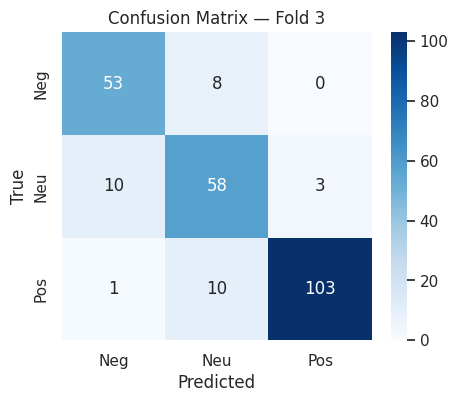


===== FOLD 4/5 =====


Map:   0%|          | 0/983 [00:00<?, ? examples/s]

Map:   0%|          | 0/246 [00:00<?, ? examples/s]

⚖️ Pesos das classes: [1.3319783210754395, 1.1619385480880737, 0.7201465368270874]


Epoch,Training Loss,Validation Loss,Accuracy,Precision Macro,Recall Macro,F1 Macro,F1 Weighted
1,0.772800,0.398254,0.861789,0.844368,0.841533,0.842009,0.860134
2,0.332500,0.320792,0.894309,0.885281,0.884405,0.883612,0.895373
3,0.216300,0.367434,0.890244,0.879623,0.875167,0.877266,0.889605
4,0.135500,0.445283,0.878049,0.863116,0.861314,0.862086,0.878162
5,0.068400,0.456201,0.886179,0.869968,0.870704,0.869887,0.887124


Fold 4 — acc: 0.8862, f1_macro: 0.8699, f1_weighted: 0.8871


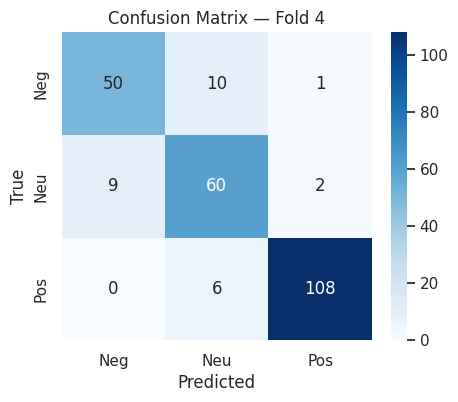


===== FOLD 5/5 =====


Map:   0%|          | 0/984 [00:00<?, ? examples/s]

Map:   0%|          | 0/245 [00:00<?, ? examples/s]

⚖️ Pesos das classes: [1.3333333730697632, 1.1631205081939697, 0.719298243522644]


Epoch,Training Loss,Validation Loss,Accuracy,Precision Macro,Recall Macro,F1 Macro,F1 Weighted
1,0.766900,0.431334,0.844898,0.833305,0.825551,0.828798,0.844951
2,0.341200,0.393422,0.857143,0.851695,0.845640,0.846687,0.859146
3,0.195700,0.457414,0.861224,0.849874,0.850129,0.849399,0.862837
4,0.126300,0.573180,0.861224,0.849435,0.854183,0.851666,0.861700
5,0.055900,0.600917,0.844898,0.832711,0.831555,0.831091,0.847169


Fold 5 — acc: 0.8449, f1_macro: 0.8311, f1_weighted: 0.8472


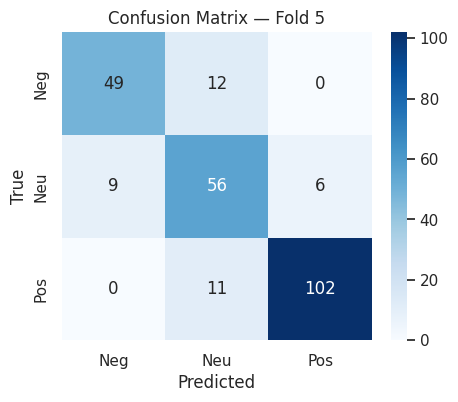

In [ ]:
# =========================
# Célula 5 — 5-fold stratified training loop com Trainer
# =========================
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED)

fold_results = []
all_conf_matrices = []

# 🔹 Acumuladores para matriz agregada e para ROC
classes = [0, 1, 2]
labels_names = ["Negativo", "Neutro", "Positivo"]
cm_total = np.zeros((len(classes), len(classes)), dtype=int)
all_labels = []
all_probs = []


for fold, (train_idx, val_idx) in enumerate(skf.split(df["text"], df["label"]), start=1):
    print(f"\n===== FOLD {fold}/{N_SPLITS} =====")

    # Subsets
    train_df = df.iloc[train_idx].reset_index(drop=True)
    val_df = df.iloc[val_idx].reset_index(drop=True)

    # HuggingFace datasets
    hf_train = Dataset.from_pandas(train_df)
    hf_val = Dataset.from_pandas(val_df)

    # Tokenize
    hf_train = hf_train.map(tokenize_batch, batched=True, remove_columns=["text"])
    hf_val = hf_val.map(tokenize_batch, batched=True, remove_columns=["text"])

    # rename label column to 'labels' required by Trainer's default data collator
    hf_train = hf_train.rename_column("label", "labels")
    hf_val = hf_val.rename_column("label", "labels")

    hf_train.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
    hf_val.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

    # instantiate model (fresh weights)
    model = BertBiLSTMAttention(MODEL_NAME, num_labels=NUM_LABELS, lstm_hidden=256, dropout=DROPOUT, labels_for_weights=train_df["label"].values)
    model.to(DEVICE)

    # TrainingArguments
    output_dir = f"./bert_bilstm_attn_fold{fold}"
    training_args = TrainingArguments(
        output_dir=output_dir,
        num_train_epochs=EPOCHS,
        per_device_train_batch_size=BATCH_SIZE,
        per_device_eval_batch_size=BATCH_SIZE,
        learning_rate=LR,
        weight_decay=WEIGHT_DECAY,
        eval_strategy="epoch",
        save_strategy="no",
        logging_dir=f"{output_dir}/logs",
        logging_steps=50,
        report_to="none",
        seed=SEED,
    )

    # compute_metrics for trainer
    def compute_metrics(eval_pred):
        logits = eval_pred.predictions
        labels = eval_pred.label_ids
        preds = np.argmax(logits, axis=1)
        acc = accuracy_score(labels, preds)
        prec_macro = precision_score(labels, preds, average="macro", zero_division=0)
        rec_macro = recall_score(labels, preds, average="macro", zero_division=0)
        f1_macro = f1_score(labels, preds, average="macro", zero_division=0)
        f1_weighted = f1_score(labels, preds, average="weighted", zero_division=0)
        return {
            "accuracy": acc,
            "precision_macro": prec_macro,
            "recall_macro": rec_macro,
            "f1_macro": f1_macro,
            "f1_weighted": f1_weighted
        }

    # Trainer (the Trainer will call our model and get dict with loss/logits)
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=hf_train,
        eval_dataset=hf_val,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics,
    )

    # Train
    trainer.train()

    # Evaluate / predict on validation set
    out = trainer.predict(hf_val)
    logits = out.predictions
    y_true = out.label_ids
    y_pred = np.argmax(logits, axis=1)

    # metrics
    acc = accuracy_score(y_true, y_pred)
    prec_macro = precision_score(y_true, y_pred, average="macro", zero_division=0)
    rec_macro = recall_score(y_true, y_pred, average="macro", zero_division=0)
    f1_macro = f1_score(y_true, y_pred, average="macro", zero_division=0)
    f1_weighted = f1_score(y_true, y_pred, average="weighted", zero_division=0)

    print(f"Fold {fold} — acc: {acc:.4f}, f1_macro: {f1_macro:.4f}, f1_weighted: {f1_weighted:.4f}")

    # Guardar para ROC agregada
    probs = torch.softmax(torch.tensor(logits), dim=1).numpy()  # converte logits em probabilidades
    all_labels.extend(y_true)
    all_probs.extend(probs)


    cm = confusion_matrix(y_true, y_pred, labels=[0,1,2])
    all_conf_matrices.append(cm)

    fold_results.append({
        "fold": fold,
        "accuracy": acc,
        "precision_macro": float(prec_macro),
        "recall_macro": float(rec_macro),
        "f1_macro": float(f1_macro),
        "f1_weighted": float(f1_weighted)
    })

    # Plot confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Neg","Neu","Pos"], yticklabels=["Neg","Neu","Pos"])
    plt.title(f"Confusion Matrix — Fold {fold}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # cleanup
    del model
    del trainer
    torch.cuda.empty_cache()
    gc.collect()


,fold,accuracy,precision_macro,recall_macro,f1_macro,f1_weighted
0,1,0.914634,0.908026,0.901833,0.902092,0.912513
1,2,0.861789,0.853616,0.848492,0.850536,0.862624
2,3,0.869919,0.854327,0.863088,0.857826,0.871954
3,4,0.886179,0.869968,0.870704,0.869887,0.887124
4,5,0.844898,0.832711,0.831555,0.831091,0.847169


Médias das métricas (mean ± std):
                 mean       std
accuracy     0.875484  0.026463
f1_macro     0.862286  0.026331
f1_weighted  0.876277  0.024915


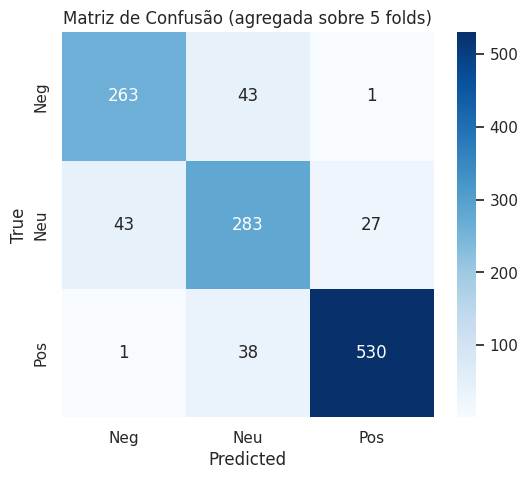

Salvo bert_bilstm_attn_metrics_per_fold.csv


In [ ]:
# =========================
# Célula 6 — Resumo e métricas agregadas
# =========================
df_folds = pd.DataFrame(fold_results)
display(df_folds)

print("Médias das métricas (mean ± std):")
print(df_folds[["accuracy","f1_macro","f1_weighted"]].agg(["mean","std"]).T)

# Matriz de confusão agregada (soma)
agg_cm = np.sum(all_conf_matrices, axis=0)
plt.figure(figsize=(6,5))
sns.heatmap(agg_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo","Neutro","Positivo"], yticklabels=["Negativo","Neutro","Positivo"])
plt.title("Matriz de Confusão (agregada sobre 5 folds)")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# Salvar métricas
df_folds.to_csv("bert_bilstm_attn_metrics_per_fold.csv", index=False)
print("Salvo bert_bilstm_attn_metrics_per_fold.csv")



Gerando Curva ROC Multiclasse Agregada...


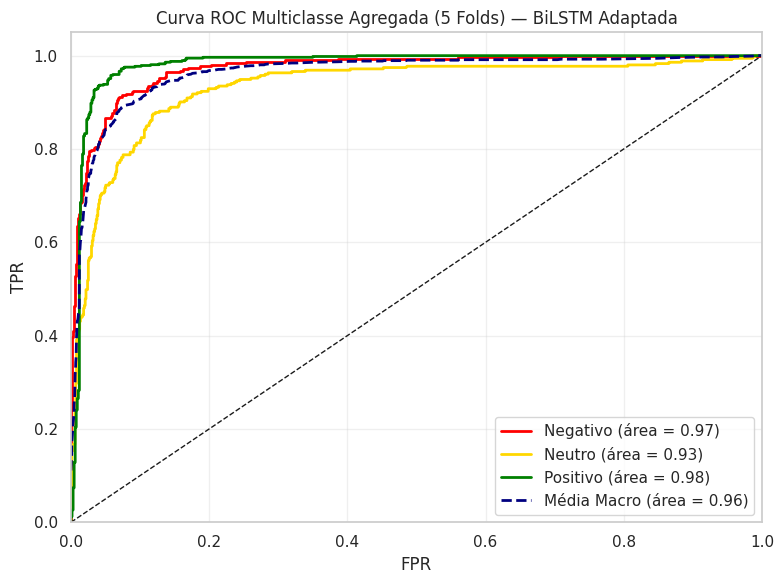

In [ ]:
# =========================
# Célula 7 — Curva ROC Multiclasse Agregada (adaptada do modelo large)
# =========================
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import torch.nn.functional as F

print("\nGerando Curva ROC Multiclasse Agregada...")

# Converter listas acumuladas em arrays numpy
all_labels = np.array(all_labels)
all_probs = np.array(all_probs)

# Binarizar os rótulos para ROC multiclasses
y_bin = label_binarize(all_labels, classes=classes)
n_classes = y_bin.shape[1]

# Calcular FPR, TPR e AUC por classe
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], all_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular média macro (média das curvas)
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc["macro"] = auc(all_fpr, mean_tpr)

# 🎨 Plotar curvas ROC com mesmo estilo do modelo large
plt.figure(figsize=(8,6))
colors = ["red", "gold", "green"]
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"{labels_names[i]} (área = {roc_auc[i]:.2f})")
plt.plot(all_fpr, mean_tpr, color="navy", linestyle="--",
         label=f"Média Macro (área = {roc_auc['macro']:.2f})", lw=2)
plt.plot([0, 1], [0, 1], "k--", lw=1)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curva ROC Multiclasse Agregada (5 Folds) — BiLSTM Adaptada")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
